Coin sums
Problem 31 
In England the currency is made up of pound, £, and pence, p, and there are eight coins in general circulation:

1p, 2p, 5p, 10p, 20p, 50p, £1 (100p) and £2 (200p).
It is possible to make £2 in the following way:

1×£1 + 1×50p + 2×20p + 1×5p + 1×2p + 3×1p
How many different ways can £2 be made using any number of coins?

- looks like McNuggets problem
- lets take the opportunity to get to know Google ORTools 
- apparently, this is the fastest solution currently: https://arxiv.org/pdf/1507.02318.pdf 
- this is also nice https://cs.uwaterloo.ca/~shallit/Talks/frob6.pdf

In [1]:
from ortools.constraint_solver import pywrapcp

slvr = pywrapcp.Solver("slvr")

c1, c2, c5, c10, c20, c50, c100, c200 = [1, 2, 5, 10, 20, 50, 100, 200]
value = 200

#coinsum = slvr.IntVar(0, value, "coinsum")
v1 = slvr.IntVar(0, (value//c1), "c1")
v2 = slvr.IntVar(0, (value//c2), "c2")
v5 = slvr.IntVar(0, (value//c5), "c5")
v10 = slvr.IntVar(0, (value//c10), "c10")
v20 = slvr.IntVar(0, (value//c20), "c20")
v50 = slvr.IntVar(0, (value//c50), "c50")
v100 = slvr.IntVar(0, (value//c100), "c100")
v200 = slvr.IntVar(0, (value//c200), "c200")

slvr.Add(value == (v1 * c1 + v2 * c2 + v5 * c5 + v10 * c10 + v20 * c20 + v50 * c50 + v100 * c100 + v200 * c200))
dec = slvr.Phase([v1, v2, v5, v10, v20, v50, v100, v200], slvr.CHOOSE_FIRST_UNBOUND, slvr.ASSIGN_MIN_VALUE)

slvr.Solve(dec)


True

In [2]:
counter =0
while slvr.NextSolution():
    counter+= 1
    # print(v1.Value() * c1 + v2.Value() * c2 + v5.Value() * c5 + v10.Value() * c10 + v20.Value() * c20 + v50.Value() * c50 + v100.Value() * c100 + v200.Value() * c200, "and",  v1.Value(), v2.Value(), v5.Value(), v10.Value(), v20.Value(), v50.Value(), v100.Value(), v200.Value())
    
print(counter)

73682


In [ ]:
# Uli's faster solution
%%timeit
coins = [1, 2, 5, 10, 20, 50, 100, 200]

def count(n, m): 
    if n < 0 or m <= 0:
        return 0
    elif n == 0:
        return 1
    return count( n, m - 1 ) + count( n - coins[m-1], m )

count(200, len(coins))

In [ ]:
# Nayuki's much faster solution
%%timeit

# ... standard dynamic programming algorithm to solve the subset sum problem over integers.
# The order of the coin values does not matter, but the values need to be unique.

TOTAL = 200

# At the start of each loop iteration, ways[i] is the number of ways to use {any copies
# of the all the coin values seen before this iteration} to form an unordered sum of i
ways = [1] + [0] * TOTAL
for coin in [1, 2, 5, 10, 20, 50, 100, 200]:
    for i in range(len(ways) - coin):
        ways[i + coin] += ways[i]
print(str(ways[-1]))

In [17]:
# lets play some more

from ortools.constraint_solver import pywrapcp

sl = pywrapcp.Solver("sl")

priceA = 600
priceB = 900
priceC = 2000
priceD = 1500
priceE = 1100

priceF = 350
priceG = 499
priceH = 2599
priceI = 3200
priceJ = 999

limit = 20000

total = sl.IntVar(0, limit, "total")
a = sl.IntVar(0, (limit//priceA), "a")
b = sl.IntVar(0, (limit//priceB), "b")
c = sl.IntVar(0, (limit//priceC), "c")
d = sl.IntVar(0, (limit//priceD), "d")
e = sl.IntVar(0, (limit//priceE), "e")

# f = sl.IntVar(0, (limit//priceF), "f")
#g = sl.IntVar(0, (limit//priceG), "g")
#h = sl.IntVar(0, (limit//priceH), "h")
#i = sl.IntVar(0, (limit//priceI), "i")
j = sl.IntVar(0, (limit//priceJ), "j")

sl.Add(total == (a*priceA 
                 + b*priceB 
                 + c*priceC 
                 + d*priceD 
                 + e*priceE 
                 #+ f*priceF 
                 #+ g*priceG 
                 #+ h*priceH 
                 #+ i*priceI 
                 + j*priceJ))

decb = sl.Phase([total, 
                 a, 
                 b, 
                 c, 
                 d, 
                 e, 
                 #f,
                 #g, 
                 #h, 
                 #i, 
                 j
                ], sl.CHOOSE_FIRST_UNBOUND, sl.ASSIGN_MIN_VALUE)

In [ ]:
sl.Solve(decb)

nuggets = set(range(limit+1))
nonnuggets = set()

while sl.NextSolution():
    x = total.Value()
    nuggets = nuggets - {x}

print(nuggets)

In [19]:
nonnuggets = set(range(limit+1)) - nuggets

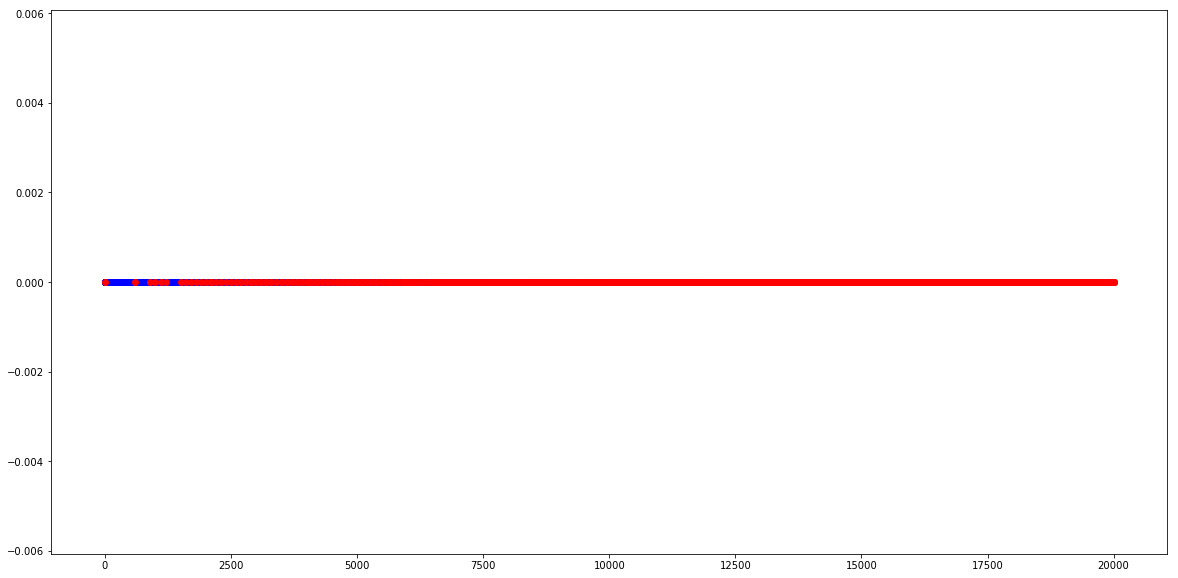

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.gcf().set_size_inches(20,10)
X1 = list(nuggets)
Y1 = [0]*len(nuggets)
X2 = list(nonnuggets)
Y2 = [0]*len(nonnuggets)

plt.scatter(X1,Y1,color='blue')
plt.scatter(X2,Y2,color='red')
plt.show()